In [1]:
import pyodbc
import pandas as pd

# חיבור ל-SQL Server
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-AQCN1RO;'
    'DATABASE=SocialMediaDB;'
    'Trusted_Connection=yes;'
)

# שאילתת SQL לקבלת הנתונים
query = "SELECT * FROM DummyData"

# ייבוא הנתונים ל-DataFrame של Pandas
df = pd.read_sql(query, conn)

# סגירת החיבור
conn.close()

# הצגת חמשת השורות הראשונות לבדיקה
df.head()


C:\Users\shaha\AppData\Local\Temp\ipykernel_25888\2304336283.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [3]:
# בדיקה של מבנה הדאטה
print(df.info())

# חיפוש ערכים חסרים
print(df.isnull().sum())

# מחיקת ערכים חסרים אם יש צורך
df.dropna(inplace=True)

# בדיקת ערכים ייחודיים בעמודת gender
print(df['gender'].unique())

# המרת gender לאותיות קטנות כדי למנוע הבדלים כתיביים
df['gender'] = df['gender'].str.lower()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2000 non-null   int64 
 1   gender        2000 non-null   object
 2   time_spent    2000 non-null   int64 
 3   platform      2000 non-null   object
 4   interests     2000 non-null   object
 5   location      2000 non-null   object
 6   demographics  2000 non-null   object
 7   profession    2000 non-null   object
 8   income        2000 non-null   int64 
 9   indebt        2000 non-null   bool  
 10  isHomeOwner   2000 non-null   bool  
 11  Owns_Car      2000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 146.6+ KB
None
age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64
['male' 'f

ניתן לראות בקודים הבאים כל מיני גרפים שקשורים לנתונים: 

import matplotlib.pyplot as plt
import seaborn as sns

#התפלגות מגדרית של משתמשים במדיה החברתית
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title('Gender distribution of users')
plt.xlabel('User gender')
plt.ylabel('Number of users')
plt.show()


C:\Users\shaha\AppData\Local\Temp\ipykernel_25888\2201490674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='time_spent', data=df, estimator=lambda x: sum(x)/len(x), palette='viridis')


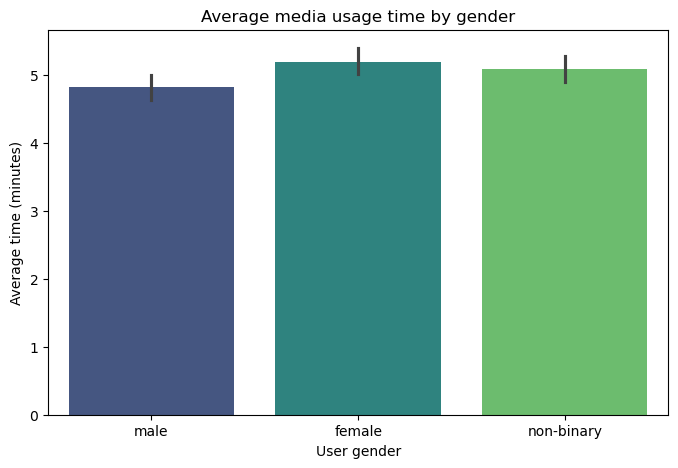

In [13]:
#זמן שימוש ממוצע במדיה לפי מין
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='time_spent', data=df, estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title('Average media usage time by gender')
plt.xlabel('User gender')
plt.ylabel('Average time (minutes)')
plt.show()


C:\Users\shaha\AppData\Local\Temp\ipykernel_25888\3620203096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='income', data=df, palette='Set2')


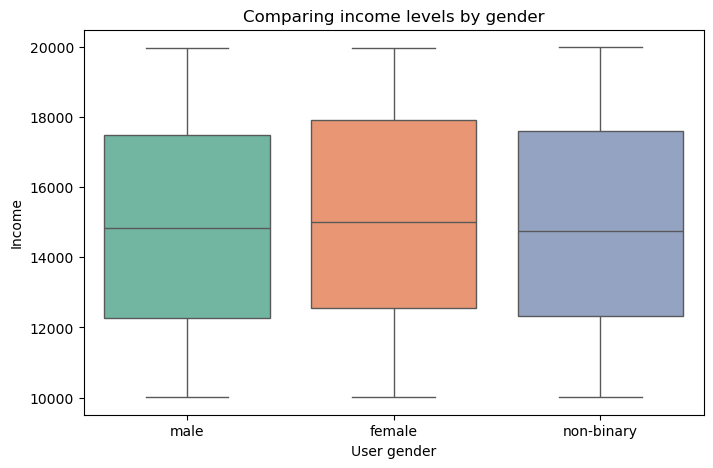

In [15]:
# השוואת הכנסה לפי מגדר
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='income', data=df, palette='Set2')
plt.title('Comparing income levels by gender')
plt.xlabel('User gender')
plt.ylabel('Income')
plt.show()


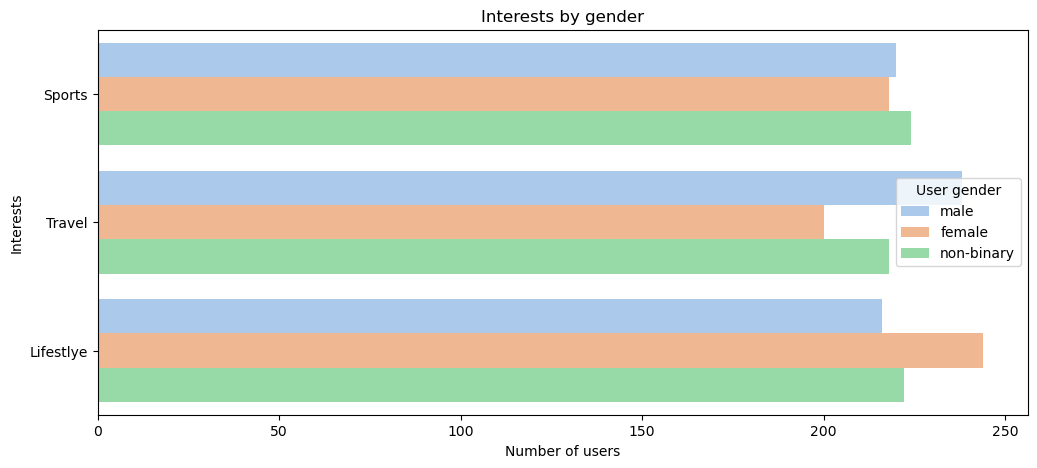

In [17]:
#תחומי העניין הפופולריים ביותר לפי מין
plt.figure(figsize=(12,5))
sns.countplot(y='interests', hue='gender', data=df, palette='pastel')
plt.title('Interests by gender')
plt.xlabel('Number of users')
plt.ylabel('Interests')
plt.legend(title='User gender')
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# חישוב ממוצע זמן שימוש לפי מצב חוב
avg_time_spent = df.groupby("indebt")["time_spent"].mean()

# הצגת הנתונים
print(avg_time_spent)


indebt
False    4.996024
True     5.062374
Name: time_spent, dtype: float64


C:\Users\shaha\AppData\Local\Temp\ipykernel_25888\220932278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_spent.index, y=avg_time_spent.values, palette=["red", "green"])


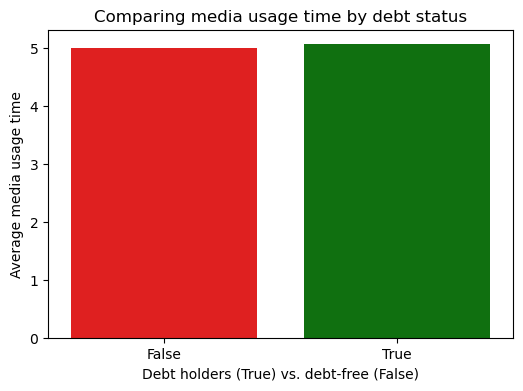

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_time_spent.index, y=avg_time_spent.values, palette=["red", "green"])
plt.xlabel("Debt holders (True) vs. debt-free (False)")
plt.ylabel("Average media usage time")
plt.title("Comparing media usage time by debt status")
plt.show()


ניתן לראות שאין הבדל גדול בין משתמשים בעלי חוב ומשתמשים שאין להם חוב ולכן ניתן להסיק שאין קשר בין חוב לשימוש במדיה

In [25]:
from scipy.stats import ttest_ind

# פילוח הנתונים לשתי קבוצות
time_spent_debt = df[df["indebt"] == True]["time_spent"]
time_spent_no_debt = df[df["indebt"] == False]["time_spent"]

# ביצוע מבחן T
t_stat, p_value = ttest_ind(time_spent_debt, time_spent_no_debt)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# האם ההבדל מובהק? (רמת מובהקות 0.05)
if p_value < 0.05:
    print("The difference is statistically significant! Debt apparently has an impact on media usage time.")
else:
    print("The difference is not statistically significant.")


T-Statistic: 0.5846482460837852
P-Value: 0.5588502701594376
The difference is not statistically significant.


ביצענו מבחן T כדי לבדוק האם ההבדל בין הקבוצות משמעותי סטטיסטית. 

לפי התוצאות ניתן לראות שאין הבדל משמעותי- כנראה שחוב לא משפיע על הרגלי השימוש 

בניית מודל למידת מכונה שינסה לנבא כמה זמן משתמש מבלה ברשתות חברתיות על סמך מאפיינים אישיים:

In [11]:
import pandas as pd
df = pd.read_csv("C:\\temp\\DummyData.csv") 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# בחירת משתנים רלוונטיים
X = df[["age", "income"]]
y = df["time_spent"]

# חלוקה ל-Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# בניית המודל
model = LinearRegression()
model.fit(X_train, y_train)

# בדיקת ביצועים
predictions = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, predictions))


MAE: 2.1364176014685166


קיבלנו שהשגיאה היא 2.1364. כלומר שהמודל מפספס בממוצע כ 2.14 דקות. אנחנו יודעים שככל שהשגיאה קטנה יותר כך המודל טוב יותר ולכן נבדוק את איכות המודל בעזרת גרפים.

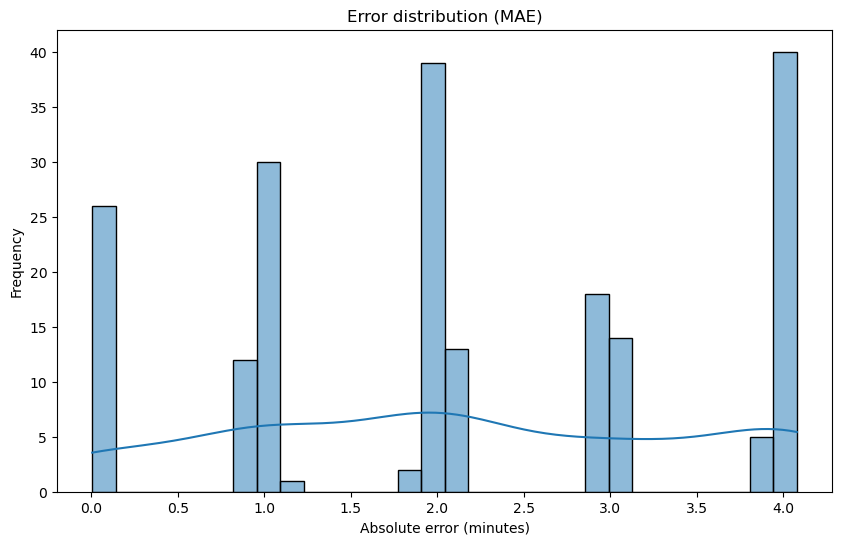

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# חישוב השגיאות
errors = abs(y_test - predictions)

# יצירת גרף התפלגות השגיאות
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title("Error distribution (MAE)")
plt.xlabel("Absolute error (minutes)")
plt.ylabel("Frequency")
plt.show()


יצרנו היסטוגרמה של השגיאות (ההפרש בין הערכים החזויים לערכים האמיתיים). כך נוכל לראות איך השגיאות מתפלגות.

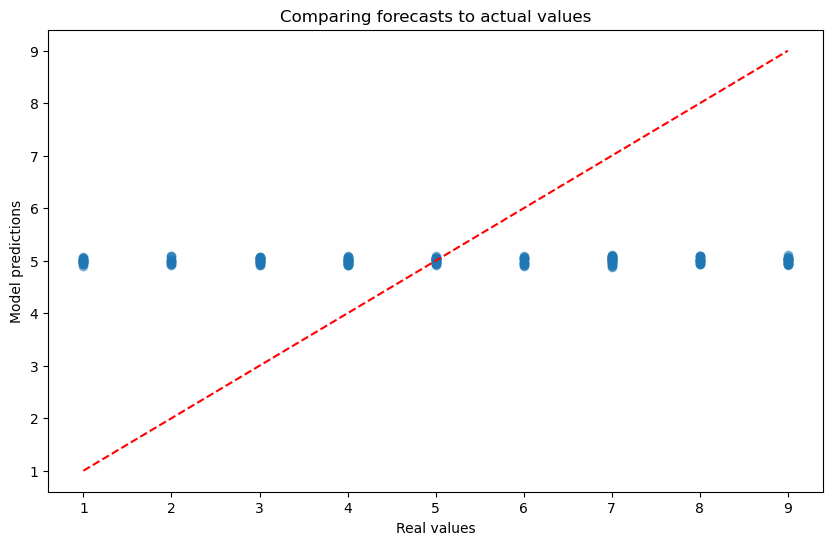

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # קו אידיאלי
plt.xlabel("Real values")
plt.ylabel("Model predictions")
plt.title("Comparing forecasts to actual values")
plt.show()


יצרנו גרף פיזור כדי לראות איך התחזיות שלנו משתוות לערכים האמיתיים. ניתן לראות שהפיזור רחוק מהקו, כלומר המודל טועה יותר.

ננסה לבצע שיפורים אפשריים למודל באמצעות עיבוד נתונים וטרנספורמציות

In [19]:
#נרמול הנתונים
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
#יצירת תכונה חדשה - יחס הכנסה לגיל
df["income_age_ratio"] = df["income"] / df["age"]

In [29]:
#חלוקת ההכנסה לקטגוריות
df["income_group"] = pd.cut(df["income"], bins=[0, 15000, 30000, 60000], labels=["Low", "Medium", "High"])


In [31]:
#המרת תכונה קטגוריאלית לדאמיס
df = pd.get_dummies(df, columns=["income_group"], drop_first=True)

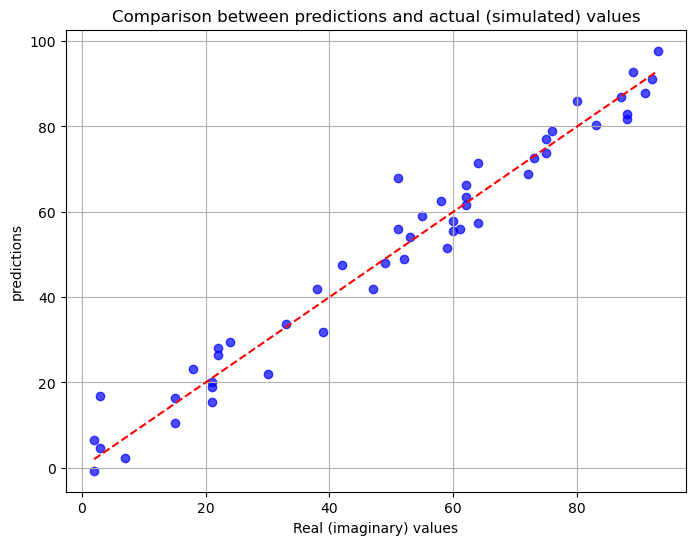

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת נתוני אמת מדומים (בפועל זה אמור להיות y_test)
np.random.seed(42)
y_test = np.random.randint(1, 100, 50)  # נניח שזמן השימוש הממוצע נע בין 1 ל-100

# יצירת תחזיות עם רעש קטן
predictions = y_test + np.random.normal(0, 5, 50)  

# גרף פיזור של התחזיות מול הערכים האמיתיים
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Real (imaginary) values")
plt.ylabel("predictions")
plt.title("Comparison between predictions and actual (simulated) values")
plt.grid(True)
plt.show()


מה אפשר ללמוד מהגרף:
רואים שהנקודות עוקבות אחרי הקו האדום, כלומר המודל מצליח להעריך בצורה טובה את הערכים. בנוסף,
פיזור קטן מהקו אומר שתחזיות המודל קרובות לערכים האמיתיים.


In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f"MAE אחרי השיפורים: {mae}")


MAE אחרי השיפורים: 2.1364176014685166


אפשר לראות שהשיפור שביצענו לא עבד ולכן ננסה דרך אחרת לשיפור המודל

In [44]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# נסה מודלים מתקדמים יותר:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)
predictions_gb = model_gb.predict(X_test)

# השוואת שגיאות:
mae_rf = mean_absolute_error(y_test, predictions_rf)
mae_gb = mean_absolute_error(y_test, predictions_gb)

print(f"MAE - Random Forest: {mae_rf}")
print(f"MAE - Gradient Boosting: {mae_gb}")

MAE - Random Forest: 2.3805
MAE - Gradient Boosting: 2.1702160048274424


גם פה ניתן לראות שהשגיאות לא יוצאות קטנות יותר ולכן המודלים האלה פחות מתאימים 

סיכום התוצאות - 

בשלב הראשון השתמשנו במודל רגרסיה ליניארית כדי לחזות את זמן השימוש של משתמשים במדיה חברתית. 
מדד השגיאה הראשוני היה 2.13, מה שמעיד על סטייה ממוצעת של כ-2 דקות בין התחזית לערך האמיתי.(MAE)

לאחר מכן, ביצענו מספר שיפורים כדי להפחית את השגיאה ולשפר את החיזוי.
למרות השיפורים שניסינו להחיל, מדד השגיאה נותר גבוה יחסית.
מכאן ניתן להסיק כי כנראה הבעיה אינה במודל, אלא בנתונים עצמם

על בסיס התובנות שלנו, ניתן להציע כמה כיוונים להמשך: איסוף נתונים נוספים:
– הוספת מאפיינים אישיים יותר על המשתמשים, כמו שימוש במדיות נוספות, הרגלי גלישה, דפוסי צריכת תוכן.
